<a href="https://colab.research.google.com/github/vin136/NN-foundations/blob/main/HW2_sols.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multinomial Naive Bayes

In [11]:
import numpy as np
from collections import defaultdict
from tqdm import tqdm_notebook

import numpy as np

class MultinomialNaiveBayes:
    def fit(self, X, y):
        # Calculate the number of classes and store the class labels
        self.classes = np.unique(y)
        n_classes = len(self.classes)
        
        # Calculate the number of samples and features
        n_samples, n_features = X.shape
        
        # Calculate the class priors
        self.priors = np.zeros(n_classes)
        for i in range(n_classes):
            self.priors[i] = np.sum(y == self.classes[i]) / n_samples
        
        # Calculate the class-conditional feature probabilities
        self.counts = np.zeros((n_classes, n_features))
        for i in range(n_classes):
            X_class = X[y == self.classes[i],:]
            self.counts[i,:] = np.sum(X_class, axis=0) + 1
        self.counts /= np.sum(self.counts, axis=1).reshape(-1, 1) + n_features
        
    def predict(self, X):
        # Calculate the log probability of each class for each sample
        log_probs = np.log(self.priors) + X @ np.log(self.counts).T
        
        # Return the class with the highest log probability for each sample
        return self.classes[np.argmax(log_probs, axis=1)]




In the multinomial Naive Bayes model, each document is represented as a bag of words and the number of occurrences of each word is used as a feature.

Given a set of m training documents, C classes, and a vocabulary of n words, let x be a new document represented as a bag of words, where x_i is the count of the i-th word in the vocabulary in the document. The goal is to find the class y that maximizes the posterior probability, P(y|x), using Bayes' Theorem:

$P(y|x) = \frac{P(x|y)P(y)}{P(x)}$

Here, P(y) is the prior probability of the class, which can be estimated as the fraction of documents in the training set that belong to class y. P(x|y) is the likelihood of the document given the class, which can be estimated as the product of the probabilities of each word in the vocabulary given the class. P(x) is the normalizing constant, which is the same for all classes and can be ignored for the purposes of estimation.

Using the multinomial distribution, the likelihood can be written as:

$P(x|y) = \prod_{i=1}^n P(x_i|y)$

Where P(x_i|y) is the probability of observing word i in a document given class y, which can be estimated as the count of word i in class y divided by the total count of all words in class y.

Finally, taking the log of the posterior probabilities makes the calculation easier and allows us to find the MAP estimate by simply taking the maximum value:

$$
\begin{aligned}
\log P(y|x) &= \log \frac{P(x|y)P(y)}{P(x)} \\
&= \log P(x|y) + \log P(y) - \log P(x) \\
\end{aligned}
$$

For prediction's we can ignore $\log P(x)$ term and report the y that has highest $\log P(y = i|x)$, where $i = {1,\dots,c}$.

In [12]:
# Example usage

#here we assume n = 4, and each X, say [1,1,2,0] represents the corresponding counts of each of those words in that sentence.
X = np.array([[1, 1, 2, 0], [2, 1, 1, 0], [0, 2, 1, 2], [1, 1, 0, 2]])
# we have two classes 
y = np.array([0, 1, 0, 1])

nb = MultinomialNaiveBayes()
nb.fit(X, y)



Here fit calculates the p(y) and also stores two sets of parameters p(x|y) for y=0 and y=1. Let's check these before proceeding.

In [13]:
nb.priors

array([0.5, 0.5])

In [14]:
# in estimating 
nb.counts.shape

(2, 4)

In [ ]:
# You can use this cell to further understand the above code

Q1. Complete the missing line in `predict function` [25 points]

In [35]:
import numpy as np
from collections import defaultdict
from tqdm import tqdm_notebook

import numpy as np

class MultinomialNaiveBayes:
    def fit(self, X, y):
        # Calculate the number of classes and store the class labels
        self.classes = np.unique(y)
        n_classes = len(self.classes)
        
        # Calculate the number of samples and features
        n_samples, n_features = X.shape
        
        # Calculate the class priors
        self.priors = np.zeros(n_classes)
        for i in range(n_classes):
            self.priors[i] = np.sum(y == self.classes[i]) / n_samples
        
        # Calculate the class-conditional feature probabilities
        self.counts = np.zeros((n_classes, n_features))
        for i in range(n_classes):
            X_class = X[y == self.classes[i],:]
            self.counts[i,:] = np.sum(X_class, axis=0) + 1
        self.counts /= np.sum(self.counts, axis=1).reshape(-1, 1) + n_features
        
    def predict(self, X):
        # Calculate the log probability of each class for each sample
        log_probs = np.log(self.priors) + X @ np.log(self.counts).T
        
        # Return the class with the highest log probability for each sample
        return self.classes[np.argmax(log_probs, axis=1)]




Q2. Now let's test the effectivness of this algorithm on a real-world data set. Run the below cells and report the accuracy on the test set ? [20 POINTS]

Ans: 

In [36]:
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer

# Load the 20 Newsgroups dataset
newsgroups_train = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'))
newsgroups_test = fetch_20newsgroups(subset='test', remove=('headers', 'footers', 'quotes'))

# Convert the text data into a bag-of-words representation
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(newsgroups_train.data)
X_test = vectorizer.transform(newsgroups_test.data)



This data set has 20 different types of news

In [21]:
print(list(newsgroups_train.target_names))

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [18]:
#let's see a sample
newsgroups_train.data[0]

'I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.'

In [22]:
#The target attribute is the integer index of the category
newsgroups_train.target[0],list(newsgroups_train.target_names)[newsgroups_train.target[0]]

(7, 'rec.autos')

In [37]:
# Fit the multinomial Naive Bayes model on the training data
mnb = MultinomialNaiveBayes()
mnb.fit(X_train, newsgroups_train.target)

# Predict the class labels of the testing samples
y_pred = mnb.predict(X_test)

# Calculate the accuracy of the model
accuracy = np.mean(y_pred == newsgroups_test.target)
print("Accuracy:", accuracy)


Accuracy: 0.4626925119490175


Q3. In your code for calculating the counts(`self.counts`) 

```
self.counts[i,:] = np.sum(X_class, axis=0) + 1
```

```
 self.counts /= np.sum(self.counts, axis=1).reshape(-1, 1) + n_features
 ```

 Why do we add 1 in the numerator and include n_features ? Give a short explanation ? [25 points]

 Hint: It's called Laplace smoothing. Figure out why it's being used here.

SOL:

To deal with unseen words. It acts as a prior. (student can explain this further)

# Logistic Regression









Consider this data set

| Feature 1 | Feature 2 | Class |
|-----------|-----------|-------|
| 1         | 1         | 0     |
| 2.2         | 1.6         | 0     |
| 2.5         | 1.8         | 0     |
| 2.8         | 1.5         | 0     |
| 2.9         | 1.2         | 0     |
| 3.0        | 3.0        | 1     |


Q4. Below code plots the decision boundary of the logistic regression on this dataset. Look at the decision boundary and answer the following questions : [30 points]

a. What's the accuracy of logistic regression on this dataset ?[10 POINTS]

b. Why do you think it misclassified class 1 ? (explain in terms of the loss function) [10 POINTS]

c. This is an example of class-imbalanced data set(class frequency is heavily skewed). As we noted below, Logistic regression might give unintuitive decision boundary. Suggest any practical way of dealing with this problem ? [10 POINTS]

(you are free to search online, but understand the proposed method and write your response clearly explaining how it would potentially solve this problem)

Sol:

a. 5/6

b. The cost function can be mimized even after correctly classifying a point by pushing the decision boundary away from the points. Wnen one of the class has high frequency this can come at misclassifying the minority class. (student can further prove this claim by writing down the loss function)

c. Use class priors, use a mixture model etc. Or even use a different type of classifier. (SVM etc). (give credit as long as student explains his approach that logically makes sense.)

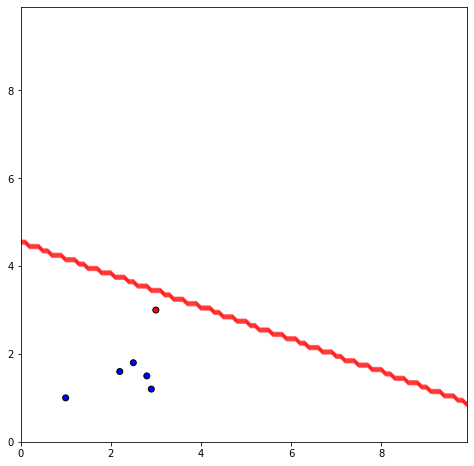

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt

# Define the dataset
X = np.array([[1, 1.0], [2.2, 1.6], [2.5, 1.8], [2.8, 1.5], [2.9, 1.2], [3.0, 3.0]])
y = np.array([0, 0, 0, 0, 0, 1])

# Fit logistic regression and SVM models
lr = LogisticRegression()
lr.fit(X, y)



# Define a grid of points to visualize the decision boundary
xx, yy = np.meshgrid(np.arange(0, 10, 0.1),
                     np.arange(0, 10, 0.1))
Z_lr = lr.predict(np.c_[xx.ravel(), yy.ravel()])
Z_lr = Z_lr.reshape(xx.shape)



# Plot the decision boundary and the dataset
fig, ax = plt.subplots(figsize=(8, 8))
ax.contour(xx, yy, Z_lr, colors='red', alpha=0.5)
#ax.contour(xx, yy, Z_svm, colors='blue', alpha=0.5, levels=[0])
ax.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='black')
plt.show()